In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Load the dataset
TSLA = pd.read_csv('TSLA.csv')

#Diplay dataset
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-02-11,30.400000,32.652000,29.400000,30.094000,30.094000,71262000
1,2016-02-12,31.000000,31.402000,28.740000,30.208000,30.208000,36179000
2,2016-02-16,31.740000,32.590000,30.822001,31.034000,31.034000,27969000
3,2016-02-17,31.799999,33.868000,31.336000,33.736000,33.736000,29126000
4,2016-02-18,34.484001,34.590000,32.953999,33.354000,33.354000,19438000
...,...,...,...,...,...,...,...
1254,2021-02-04,855.000000,856.500000,833.419983,849.989990,849.989990,15812700
1255,2021-02-05,845.000000,864.770020,838.969971,852.229980,852.229980,18524800
1256,2021-02-08,869.669983,877.770020,854.750000,863.419983,863.419983,20161700
1257,2021-02-09,855.119995,859.799988,841.750000,849.460022,849.460022,15157700


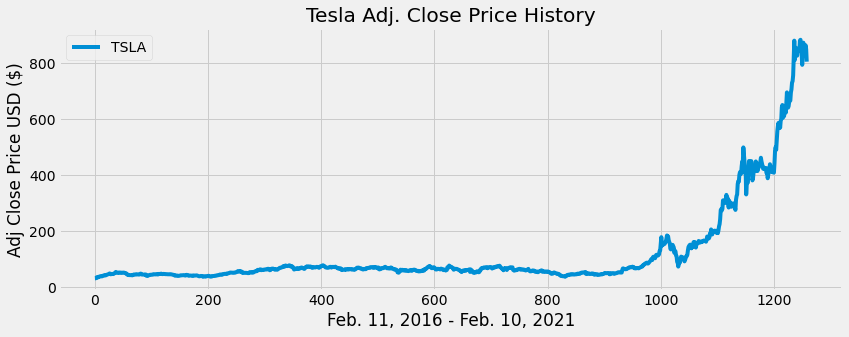

In [5]:
#Visualise data
plt.figure(figsize=(12.5, 4.5))
plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.title('Tesla Adj. Close Price History')
plt.xlabel('Feb. 11, 2016 - Feb. 10, 2021')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc= 'upper left')

plt.show()

In [14]:
#Create simple moving average with a 30 day window
MA30 = pd.DataFrame()
MA30['Adj Close'] = TSLA['Adj Close'].rolling(window = 30).mean()
MA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,794.741998
1255,801.804997
1256,809.052997
1257,815.309330


In [15]:
#Create moving average with a 100 day window 
MA100 = pd.DataFrame()
MA100['Adj Close'] = TSLA['Adj Close'].rolling(window = 100).mean()
MA100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1254,574.240200
1255,578.566300
1256,582.702899
1257,586.779900


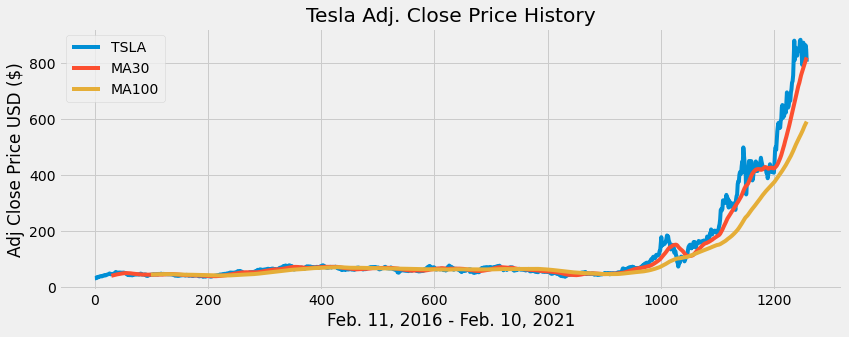

In [16]:
#Visualise plot with moving averages 
plt.figure(figsize=(12.5, 4.5))

plt.plot(TSLA['Adj Close'], label = 'TSLA')
plt.plot(MA30['Adj Close'], label = 'MA30')
plt.plot(MA100['Adj Close'], label = 'MA100')

plt.title('Tesla Adj. Close Price History')
plt.xlabel('Feb. 11, 2016 - Feb. 10, 2021')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc= 'upper left')

plt.show()

In [17]:
# Create new dataframe to store all the data

data = pd.DataFrame()
data['TSLA'] = TSLA['Adj Close']
data['MA30'] = MA30['Adj Close']
data['MA100'] = MA100['Adj Close']
data

,TSLA,MA30,MA100
0,30.094000,NaN,NaN
1,30.208000,NaN,NaN
2,31.034000,NaN,NaN
3,33.736000,NaN,NaN
4,33.354000,NaN,NaN
...,...,...,...
1254,849.989990,794.741998,574.240200
1255,852.229980,801.804997,578.566300
1256,863.419983,809.052997,582.702899
1257,849.460022,815.309330,586.779900


In [42]:
#Create function to signal when to buy/sell the asset or stock
def sales(data):
    sigPriceBuy = [] #signal to buy
    sigPricesell = [] #signal to sell
    flag = -1 #used to signal when the two moving averages intersect
    
    for i in range(len(data)):
        if data['MA30'][i] > data['MA100'][i]:
            if flag != 1: 
                sigPriceBuy.append(data['TSLA'][i])
                sigPricesell.append(np.nan)
                flag = 1
            else:
                sigPriceBuy.append(np.nan)
                sigPricesell.append(np.nan)
        elif data['MA30'][i] < data['MA100'][i]:
            if flag != 0: 
                sigPriceBuy.append(np.nan)
                sigPricesell.append(data['TSLA'][i])
                flag = 0
            else:
                sigPriceBuy.append(np.nan)
                sigPricesell.append(np.nan)
        else:
                sigPriceBuy.append(np.nan)
                sigPricesell.append(np.nan)
                
    return(sigPriceBuy, sigPricesell)

In [43]:
#Store buy/sell data in a variable

sales = sales(data)
data['Buy_Signal_Price'] = sales[0]
data['Sell_Signal_Price'] = sales[1]

In [44]:
# Show data
data

,TSLA,MA30,MA100,Buy_Signal_Price,Sell_Signal_Price
0,30.094000,NaN,NaN,NaN,NaN
1,30.208000,NaN,NaN,NaN,NaN
2,31.034000,NaN,NaN,NaN,NaN
3,33.736000,NaN,NaN,NaN,NaN
4,33.354000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1254,849.989990,794.741998,574.240200,NaN,NaN
1255,852.229980,801.804997,578.566300,NaN,NaN
1256,863.419983,809.052997,582.702899,NaN,NaN
1257,849.460022,815.309330,586.779900,NaN,NaN


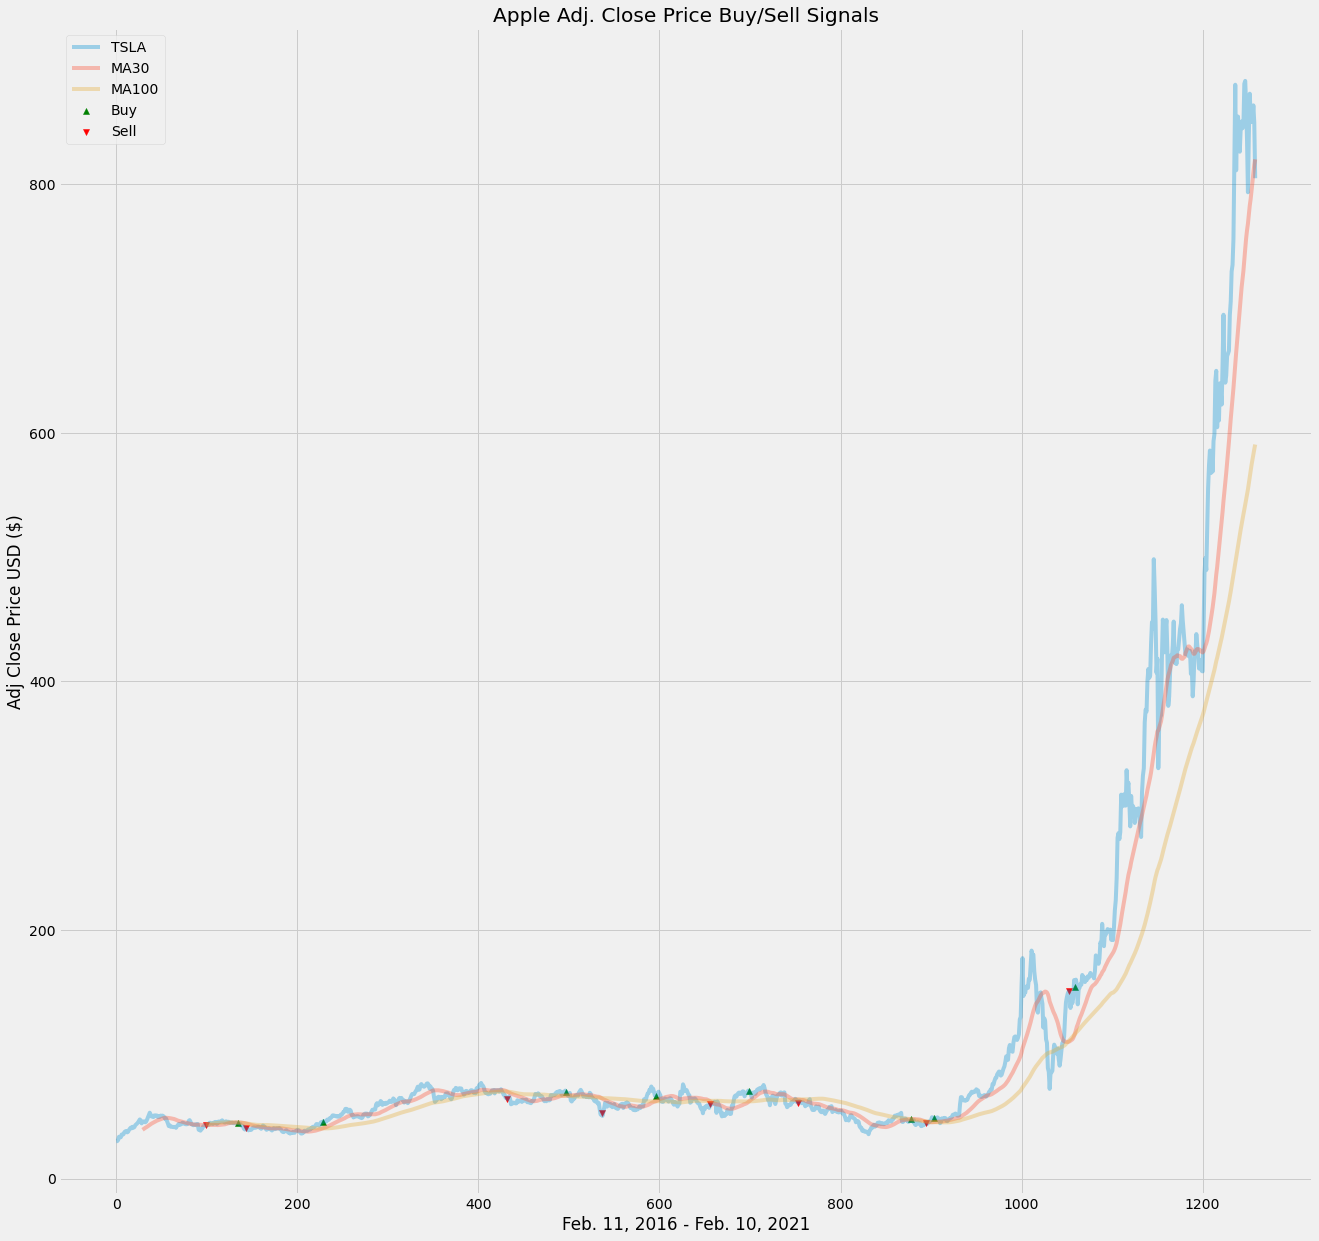

In [50]:
#Visusalise data and buy/sell strategy
plt.figure(figsize=(20, 20))
plt.plot(data['TSLA'], label = 'TSLA', alpha = 0.35)
plt.plot(data['MA30'], label = 'MA30', alpha = 0.35)
plt.plot(data['MA100'], label = 'MA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price Buy/Sell Signals')
plt.xlabel('Feb. 11, 2016 - Feb. 10, 2021')
plt.ylabel('Adj Close Price USD ($)')
plt.legend(loc= 'upper left')
plt.show()